In [243]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pandas as pd
import pylab as pl

In [244]:
weather_dataset1 = pd.read_csv('wwo_normalized_manila\\worldweatheronline_normalized_manila_2015_1day.csv', index_col=[0], parse_dates=[0], skipinitialspace=True)
weather_dataset2 = pd.read_csv('wwo_normalized_manila\\worldweatheronline_normalized_manila_2016_1day.csv', index_col=[0], parse_dates=[0], skipinitialspace=True)
weather_dataset3 = pd.read_csv('wwo_normalized_manila\\worldweatheronline_normalized_manila_2017_1day.csv', index_col=[0], parse_dates=[0], skipinitialspace=True)
weather_dataset = []
weather_dataset.append(weather_dataset1)
weather_dataset.append(weather_dataset2)
weather_dataset.append(weather_dataset3)
weather_dataset = pd.concat(weather_dataset)
weather_dataset

# weather_dataset = pd.read_csv('wwo_normalized_manila\\worldweatheronline_normalized_manila_2017.csv', index_col=['datetime'], parse_dates=['datetime'], skipinitialspace=True)
# weather_dataset = weather_dataset[:35040]

# Remove unused columms
cols_to_remove = [1,2,4,12,14,16,17,20]
weather_dataset.drop(weather_dataset.columns[[cols_to_remove]], axis=1, inplace=True)

# Reorder dataset
weather_dataset = weather_dataset[['precipMM', 'tempC', 'windspeedKmph', 'cond', 'humidity', 'visibility', 'pressure', 'cloudcover', 'heatIndexC', 'dewPointC', 'windChillC', 'windGustKmph', 'feelsLikeC']]
weather_dataset

precipMM     tempC  windspeedKmph      cond  humidity  visibility  \
2015-01-01  0.020649  0.232552       0.350260  0.565789  0.810009    0.968750   
2015-01-02  0.000000  0.231250       0.441406  0.585526  0.765097    1.000000   
2015-01-03  0.001106  0.241667       0.305398  0.631579  0.808877    1.000000   
2015-01-04  0.000369  0.278385       0.205374  0.580044  0.838240    1.000000   
2015-01-05  0.001106  0.323698       0.177083  0.399123  0.842995    0.848307   
2015-01-06  0.001106  0.357813       0.160393  0.399123  0.806914    0.771484   
2015-01-07  0.001659  0.270573       0.180279  0.414474  0.822992    0.869792   
2015-01-08  0.000000  0.222917       0.320786  0.645833  0.738074    1.000000   
2015-01-09  0.004978  0.185417       0.312263  0.559211  0.800121    0.921875   
2015-01-10  0.000369  0.183854       0.310133  0.655702  0.721014    1.000000   
2015-01-11  0.001659  0.174479       0.278527  0.611842  0.758228    1.000000   
2015-01-12  0.000922  0.213281       0.296046  0.486842  0.784647    1.000000   
2015-01-13  0.002397  0.208854       0.264086  0.399123  0.786156    0.921875   
2015-01-14  0.000369  0.288281       0.181818  0.474781  0.802612    0.848307   
2015-01-15  0.000369  0.281250       0.213423  0.399123  0.795139    0.771484   
2015-01-16  0.000000  0.253385       0.249408  0.464912  0.746150    1.000000   
2015-01-17  0.000000  0.206250       0.233546  0.447368  0.687726    1.000000   
2015-01-18  0.008919  0.163281       0.328598  0.541667  0.618961    0.854167   
2015-01-19  0.000115  0.322396       0.087358  0.480263  0.644248    1.000000   
2015-01-20  0.000000  0.377083       0.117069  0.489035  0.610734    1.000000   
2015-01-21  0.000254  0.413281       0.071378  0.589912  0.616923    1.000000   
2015-01-22  0.002282  0.360938       0.210582  0.713268  0.610583    1.000000   
2015-01-23  0.000968  0.222135       0.351918  0.560855  0.639719    1.000000   
2015-01-24  0.000000  0.216667       0.338778  0.353070  0.624849    1.000000   
2015-01-25  0.000000  0.266146       0.224077  0.414474  0.642889    1.000000   
2015-01-26  0.000000  0.366667       0.198509  0.447368  0.660628    1.000000   
2015-01-27  0.000000  0.367969       0.163471  0.450658  0.640550    1.000000   
2015-01-28  0.001106  0.373698       0.168324  0.503289  0.630359    1.000000   
2015-01-29  0.000000  0.333333       0.187855  0.381579  0.692180    1.000000   
2015-01-30  0.000000  0.301302       0.220052  0.418860  0.643871    1.000000   
...              ...       ...            ...       ...       ...         ...   
2017-12-02  0.000000  0.418750       0.294010  0.631579  0.560937    0.444444   
2017-12-03  0.000000  0.443750       0.242448  0.631579  0.565712    0.444444   
2017-12-04  0.000362  0.439583       0.226562  0.657895  0.550868    0.444444   
2017-12-05  0.000000  0.391667       0.349219  0.631579  0.548264    0.444444   
2017-12-06  0.000000  0.385417       0.389193  0.631579  0.531858    0.444444   
2017-12-07  0.000166  0.395833       0.224870  0.597588  0.585243    0.444444   
2017-12-08  0.021935  0.408333       0.202083  0.580044  0.596528    0.395833   
2017-12-09  0.000000  0.418750       0.190625  0.559211  0.554080    0.444444   
2017-12-10  0.001615  0.447917       0.116406  0.578947  0.548177    0.444444   
2017-12-11  0.000196  0.395052       0.320443  0.631579  0.559809    0.444444   
2017-12-12  0.000000  0.371615       0.349479  0.631579  0.522483    0.444444   
2017-12-13  0.000000  0.363802       0.408203  0.631579  0.521701    0.444444   
2017-12-14  0.000000  0.311719       0.481120  0.631579  0.489931    0.444444   
2017-12-15  0.000000  0.295833       0.228776  0.486842  0.394271    0.772569   
2017-12-16  0.020094  0.222917       0.131771  0.663377  0.539497    0.442708   
2017-12-17  0.028306  0.255469       0.459896  0.640625  0.560156    0.355324   
2017-12-18  0.075151  0.275781       0.366146  0.656524  0.695660    0.362269   
2017-12-19  0.009028  0.359115       0.2700

In [245]:
x = weather_dataset.loc[:, weather_dataset.columns != 'precipMM'].values.tolist()
y = weather_dataset['precipMM']

In [246]:
# In order to do multiple regression we need to add a column of 1s for x0
x = np.array([np.concatenate((v,[1])) for v in x])

In [247]:
# First 10 elements of the data
print(x[:10])

[[ 0.23255208  0.35026042  0.56578947  0.81000906  0.96875     0.77550287
   0.33390625  0.26813937  0.5693109   0.23671875  0.28580729  0.26813937
   1.        ]
 [ 0.23125     0.44140625  0.58552632  0.76509662  1.          0.84823994
   0.30880208  0.24712644  0.50440705  0.23125     0.33492477  0.24712644
   1.        ]
 [ 0.24166667  0.30539773  0.63157895  0.80887681  1.          0.82650862
   0.48442708  0.27873563  0.57051282  0.24166667  0.22771991  0.27873563
   1.        ]
 [ 0.27838542  0.20537405  0.58004386  0.83823973  1.          0.76239224
   0.41854167  0.33189655  0.61217949  0.27838542  0.1733941   0.32758621
   1.        ]
 [ 0.32369792  0.17708333  0.39912281  0.84299517  0.84830729  0.74281609
   0.36114583  0.3908046   0.68589744  0.32369792  0.15024595  0.3908046
   1.        ]
 [ 0.3578125   0.16039299  0.39912281  0.80691425  0.77148438  0.73994253
   0.28083333  0.41451149  0.66225962  0.3578125   0.13621238  0.41451149
   1.        ]
 [ 0.27057292  0.180279

In [248]:
# First 10 elements of the response variable
print(y[:10])

2015-01-01    0.020649
2015-01-02    0.000000
2015-01-03    0.001106
2015-01-04    0.000369
2015-01-05    0.001106
2015-01-06    0.001106
2015-01-07    0.001659
2015-01-08    0.000000
2015-01-09    0.004978
2015-01-10    0.000369
Name: precipMM, dtype: float64


## Multiple Linear Regression

In [249]:
# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [250]:
# Let's see predictions for the first 10 instances
print(linreg.predict(x[:10]) )

[ 0.0270636   0.00509693  0.00362489  0.04550291  0.0595054   0.06872983
  0.03820815  0.02826552  0.0237919   0.0273154 ]


In [251]:
# Compute RMSE on training data
# p = np.array([linreg.predict(xi) for xi in x])
p = linreg.predict(x)
# Now we can constuct a vector of errors
err = abs(p-y)

# Let's see the error on the first 10 predictions
print(err[:10])

2015-01-01    0.006415
2015-01-02    0.005097
2015-01-03    0.002519
2015-01-04    0.045134
2015-01-05    0.058399
2015-01-06    0.067624
2015-01-07    0.036549
2015-01-08    0.028266
2015-01-09    0.018814
2015-01-10    0.026947
Name: precipMM, dtype: float64


In [252]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)
# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print(rmse_train)

0.0230445518127


In [253]:
# We can view the regression coefficients
print( 'Regression Coefficients: \n', linreg.coef_)

Regression Coefficients: 
 [ 0.85163831 -0.71847473 -0.01597359  0.4616325  -0.08222159 -0.01809241
 -0.00649892  0.39284589 -0.38834435 -0.79548031  0.98728135  0.01877207
  0.        ]


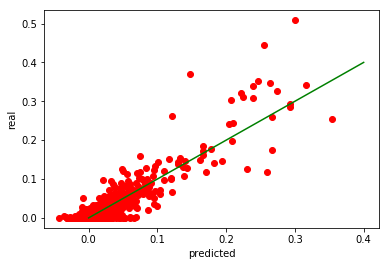

In [254]:
# Plot outputs
%matplotlib inline
pl.plot(p, y,'ro')
pl.plot([0,0.4],[0,0.4], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

## train_test_split

In [255]:
# Splitting training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, shuffle=False)

# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(X_train,Y_train)

# Let's see predictions for the first 10 instances
print(linreg.predict(X_test[:10]) )

[ 0.10660889  0.11254071  0.10110945  0.09814847  0.09866086  0.09439851
  0.16936282  0.16814764  0.11118248  0.10872969]


In [256]:
# Compute RMSE on training data
# p = np.array([linreg.predict(xi) for xi in x])
p = linreg.predict(X_test)
# Now we can constuct a vector of errors
err = abs(p-Y_test)

# Let's see the error on the first 10 predictions
print(err[:10])

2017-01-04    0.106609
2017-01-05    0.112541
2017-01-06    0.101109
2017-01-07    0.098148
2017-01-08    0.098661
2017-01-09    0.093568
2017-01-10    0.040241
2017-01-11    0.148658
2017-01-12    0.109899
2017-01-13    0.108730
Name: precipMM, dtype: float64


In [257]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)
# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print(rmse_train)

0.100545329613


In [258]:
# We can view the regression coefficients
print( 'Regression Coefficients: \n', linreg.coef_)

Regression Coefficients: 
 [ 0.63324806 -0.55190293 -0.02843747  0.26734086 -0.21995386  0.00324288
 -0.00701161  0.15737279 -0.2165422  -0.56021289  0.82072814  0.0869594   0.        ]


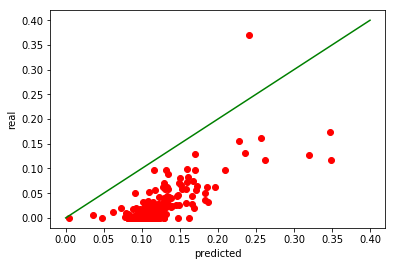

In [259]:
# Plot outputs
%matplotlib inline
pl.plot(p, Y_test,'ro')
pl.plot([0,0.4],[0,0.4], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

## 10-fold Cross Validation

In [260]:
# Now let's compute RMSE using 10-fold x-validation
kf = KFold(n_splits=10, shuffle=False, random_state=None)
xval_err = 0
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    linreg.fit(x_train, y_train)
    p = linreg.predict(x_test)
    e = p-y_test
    xval_err += np.dot(e,e)
    
rmse_10cv = np.sqrt(xval_err/len(x))

In [261]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f'  %rmse_train)
print('RMSE on 10-fold CV: %.4f'  %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 0.1005
RMSE on 10-fold CV: 0.0274


## Ridge Regression

In [262]:
# Create linear regression object with a ridge coefficient 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, shuffle=False)
# Train the model using the training set
ridge.fit(X_train,Y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [263]:
# Compute RMSE on training data
p = met.predict(X_test)
e = p-Y_test
total_error = np.dot(e,e)
rmse_train = np.sqrt(total_error/len(p))

kf = KFold(n_splits=10, shuffle=False, random_state=None)
xval_err = 0
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    ridge.fit(x_train, y_train)
    p = ridge.predict(x_test)
    e = p-y_test
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x))

method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Ridge Regression
RMSE on training: 0.0339
RMSE on 10-fold CV: 0.0316


### We can try different values of alpha and observe the impact on x-validation RMSE

In [264]:
print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(.01,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(fit_intercept=True, alpha=a)
    
    # computing the RMSE on training data
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, shuffle=False)
    ridge.fit(X_train,Y_train)
    p = ridge.predict(X_test)
    e = p-Y_test
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    kf = KFold(n_splits=10, shuffle=False, random_state=None)
    xval_err = 0
    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        ridge.fit(x_train, y_train)
        p = ridge.predict(x_test)
        e = p-y_test
        xval_err += np.dot(e,e)
    rmse_10cv = np.sqrt(xval_err/len(x))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 0.1049		 0.0272
0.418	 0.1507		 0.0310
0.826	 0.1518		 0.0333
1.234	 0.1483		 0.0346
1.642	 0.1438		 0.0354
2.050	 0.1393		 0.0360
2.458	 0.1349		 0.0364
2.866	 0.1309		 0.0367
3.274	 0.1271		 0.0370
3.682	 0.1236		 0.0372
4.090	 0.1203		 0.0374
4.498	 0.1173		 0.0375
4.906	 0.1144		 0.0376
5.313	 0.1118		 0.0378
5.721	 0.1093		 0.0379
6.129	 0.1070		 0.0380
6.537	 0.1048		 0.0381
6.945	 0.1027		 0.0382
7.353	 0.1008		 0.0382
7.761	 0.0989		 0.0383
8.169	 0.0972		 0.0384
8.577	 0.0955		 0.0385
8.985	 0.0940		 0.0385
9.393	 0.0925		 0.0386
9.801	 0.0910		 0.0387
10.209	 0.0897		 0.0387
10.617	 0.0884		 0.0388
11.025	 0.0871		 0.0388
11.433	 0.0859		 0.0389
11.841	 0.0848		 0.0389
12.249	 0.0837		 0.0390
12.657	 0.0826		 0.0390
13.065	 0.0816		 0.0391
13.473	 0.0806		 0.0392
13.881	 0.0797		 0.0392
14.289	 0.0787		 0.0393
14.697	 0.0779		 0.0393
15.104	 0.0770		 0.0393
15.512	 0.0762		 0.0394
15.920	 0.0754		 0.0394
16.328	 0.0746		 0

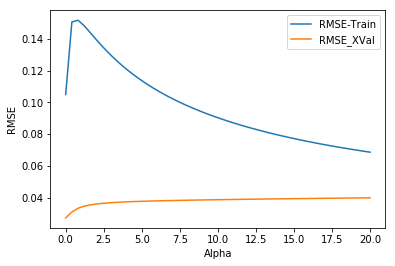

In [265]:
pl.plot(alpha, t_rmse, label='RMSE-Train')
pl.plot(alpha, cv_rmse, label='RMSE_XVal')
pl.legend( ('RMSE-Train', 'RMSE_XVal') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

### To make comparisons across methods easier, let's parametrize the regression methods:

In [266]:
a = 0.3
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True, alpha=a)),
        ('elastic-net', ElasticNet(fit_intercept=True, alpha=a))
        ]:
    
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, shuffle=False)
    
    met.fit(X_train,Y_train)
    p = met.predict(X_test)
    e = p-Y_test
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))
        
    kf = KFold(n_splits=10, shuffle=False, random_state=None)
    xval_err = 0
    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        met.fit(x_train, y_train)
        p = met.predict(x_test)
        e = p-y_test
        xval_err += np.dot(e,e)
    rmse_10cv = np.sqrt(xval_err/len(x))
    
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv)
    print("\n")

Method: linear regression
RMSE on training: 0.1005
RMSE on 10-fold CV: 0.0274


Method: lasso
RMSE on training: 0.0341
RMSE on 10-fold CV: 0.0511


Method: ridge
RMSE on training: 0.1473
RMSE on 10-fold CV: 0.0299


Method: elastic-net
RMSE on training: 0.0341
RMSE on 10-fold CV: 0.0511


